# Edge Detection

Through this notebook, we look to understand and demonstrate edge detection especially using the Canny Edge Detector in image processing.

**Question 1**

Describe the principle difference between Canny and Laplacian of Gaussian.



**Answer**

The Canny edge detector is famously based on the Sobel operator which uses the first order derivatives (gradient) operating its kernels on both x-direction and y-direction of an image and detects a jump or high variation of image intensity sudden transition to identify differentiation. However, the Laplacian of Gaussian (LoG) uses only a single kernel to calculate the second order derivatives and detects zero crossing to identify differentiation. With second order derivatives, the Laplacian of Gaussian (LoG) is extremely sensitive to image noises.

**Reference**
* https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html 
* https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html

**Question 2**

What do you know about non-maximum suppression.

**Answer**

The non-maximum suppression, also known as thinning process, is one of the main step in the famous Canny edge detector. Right after computing the gradient magnitude and direction at each pixel of the smoothed image, what we want to do is suppress the non-maximum pixels. The non-maximum suppression is a step where all the pixels that are not maximum along the gradient direction will be zero out. The purpose of non-maximum suppression is to produce thin and clean edges.

**Reference**
* https://docs.opencv.org/3.4/d7/de1/tutorial_js_canny.html 
* https://towardsdatascience.com/canny-edge-detection-in-5-minutes-27236af71ce2

**Question 3**

What do you know about hysteresis thresholding in Canny edge detection.

**Answer**

Hysteresis thresholding is the last step in the famous Canny edge detector. After non-maximum suppression, we want to set double thresholds for identifying three types of edges namely the strong edge, weak edge, and false edge. The double thresholds are set as minimum and maximum values each.
* Any edge with an intensity gradient higher than the double thresholds is identified as a strong edge.
* Any edge with an intensity gradient in between the minimum and maximum value is identified as a weak edge.
* Any edge with an intensity gradient lower than the double thresholds is identified as a false edge.

To extend further with the conditions above, false edges will be completely remove. As for weak edge, it is considered to be a part of the edges if it is connected to a strong edge. Otherwise, the weak edge is considered to be another false edge and will be completely remove. After we get the results from thresholding, the hysteresis transform weak edges into strong edges.

**Reference**
* https://docs.opencv.org/3.4/d7/de1/tutorial_js_canny.html
* https://towardsdatascience.com/canny-edge-detection-in-5-minutes-27236af71ce2

**Question 4** 

Implement both the aforementioned steps namely the non-maximum suppression and hysteresis thresholding of Canny edge detection in a python notebook and demonstrate the results.

To start with, we should first setup our environment.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy.ndimage.filters import convolve
from google.colab.patches import cv_imshow

The image used here is a tiger image retrieved from my lab session and uploaded to my personal GitHub repository [here](https://github.com/dzniel/binus-computer-vision-course/blob/main/image/tiger.jpg).

In [2]:
img = io.imread("https://github.com/dzniel/binus-computer-vision-course/blob/main/image/tiger.jpg?raw=true")
img.shape

(640, 960, 3)

As shown above, it has 3 color channels in which we will proceed to convert our image to grayscale. But let's first check our loaded image.

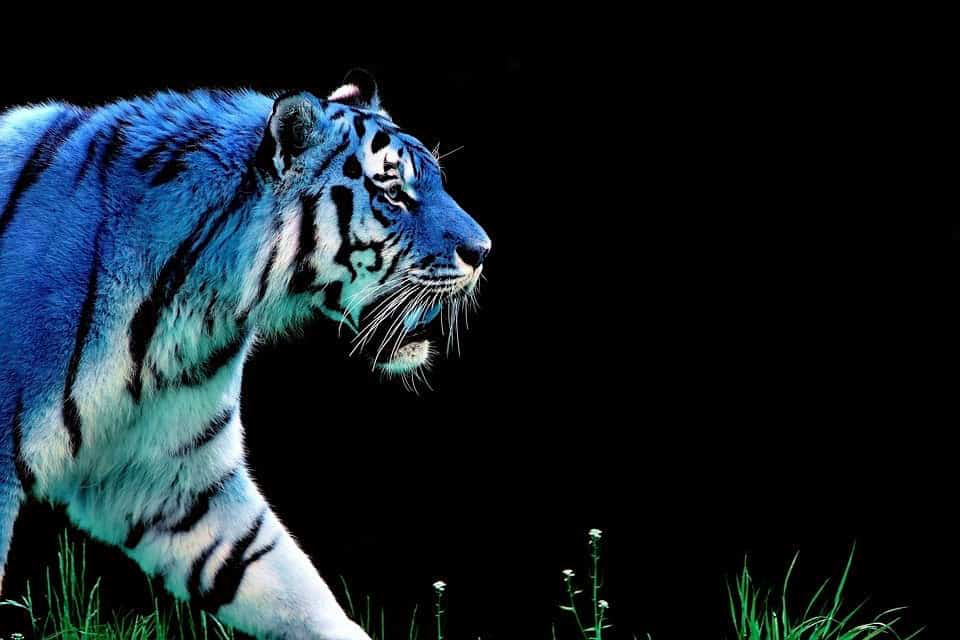

In [3]:
cv_imshow(img)

Hmm, what an unexpected color our image has. After taking some time surfing through the internet, I found out that reading an image using `skimage.io.imread(src)` would load an image as a BGR color format. What we want is the RGB color format.

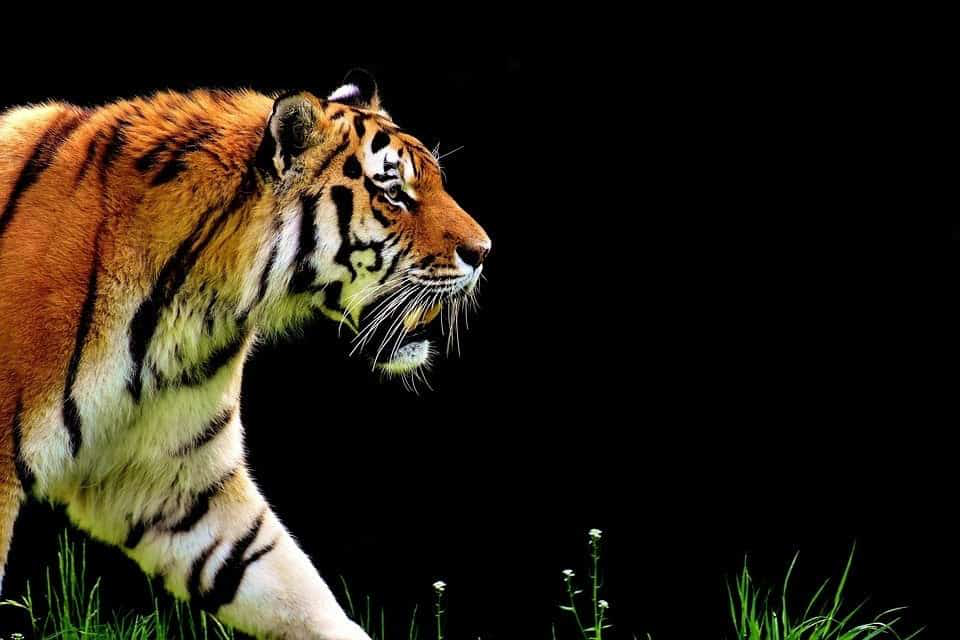

In [4]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv_imshow(img)

Finally, the tiger image is in the correct color format as it should be. Now we can start our experimentation.

In [5]:
gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
gray_img.shape

(640, 960)

Upon working on edge detection or any image processing task, we should convert our image to a grayscale image initially. Grayscale images simplify the algorithms and reduce computational requirements for experimentation.

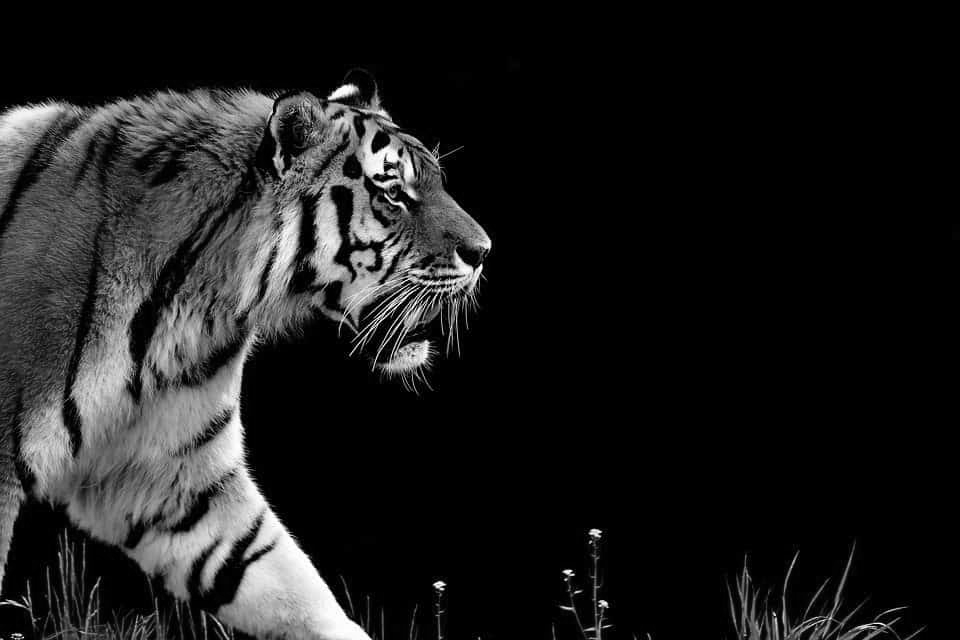

In [6]:
cv_imshow(gray_img)

There it is. After converting to a grayscale image, we want to smooth the image using the gaussian kernel with a kernel size of 3x3 and sigma set to 1 for this experimentation.

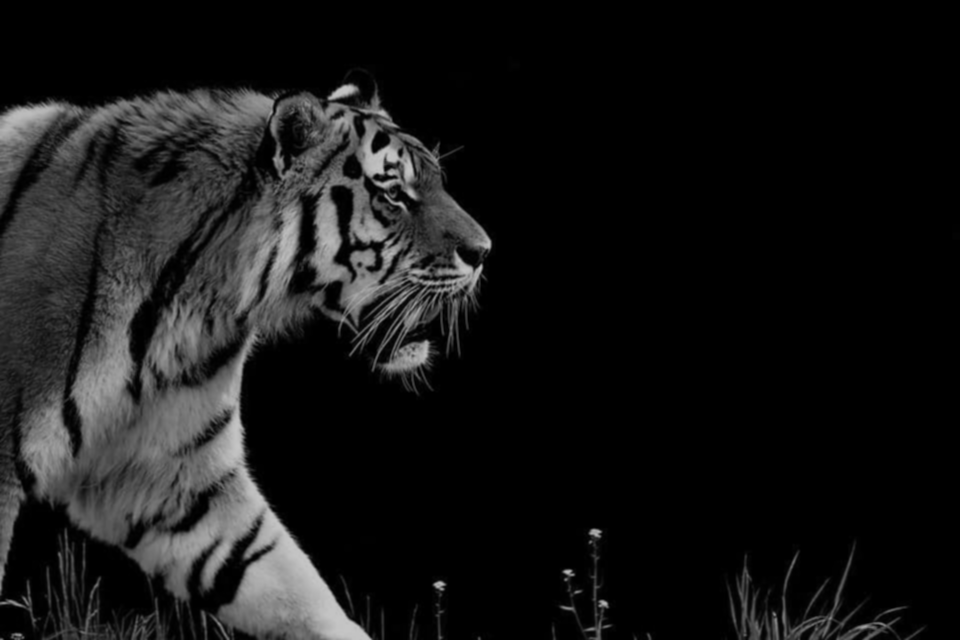

In [7]:
ksize = 3
sigma = 1
max_point = ksize // 2
min_point = -max_point
kernel = np.zeros((ksize, ksize))
for x in range(min_point, max_point + 1):
  for y in range(min_point, max_point + 1):
    value = 1 / (2 * np.pi * (sigma ** 2)) * np.exp((-(x ** 2 + y ** 2)) / (2 * (sigma ** 2)))
    kernel[x - min_point, y - min_point] = value

smoothen_img = convolve(gray_img, kernel)
cv_imshow(smoothen_img)

If we look closely, the image turns significantly darker and smoother. We can also visualize side to side both the grayscale image and smoothen image utilizing OpenCV's `cv.hconcat((image_1, image_2))`. Let's try it out!

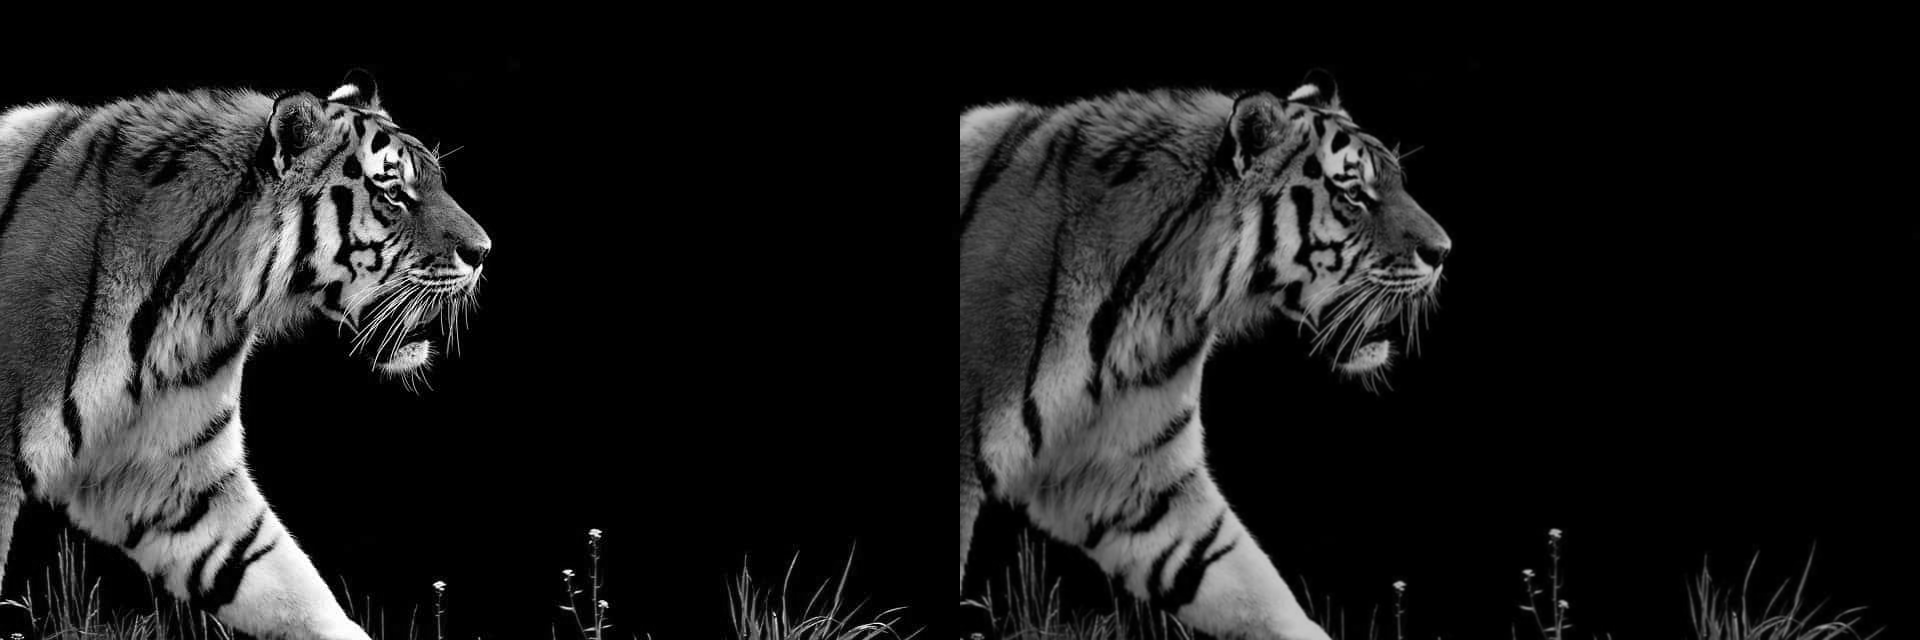

In [8]:
cv_imshow(cv.hconcat((gray_img, smoothen_img)))

Look at that, it is more obvious after we visualized it side to side to one another. After smoothing, we want to implement the **Sobel filter (Sobel operator)** on the smoothen image as it is one of the step in Canny Edge Detection for computing image gradients. Let's implement it right away.

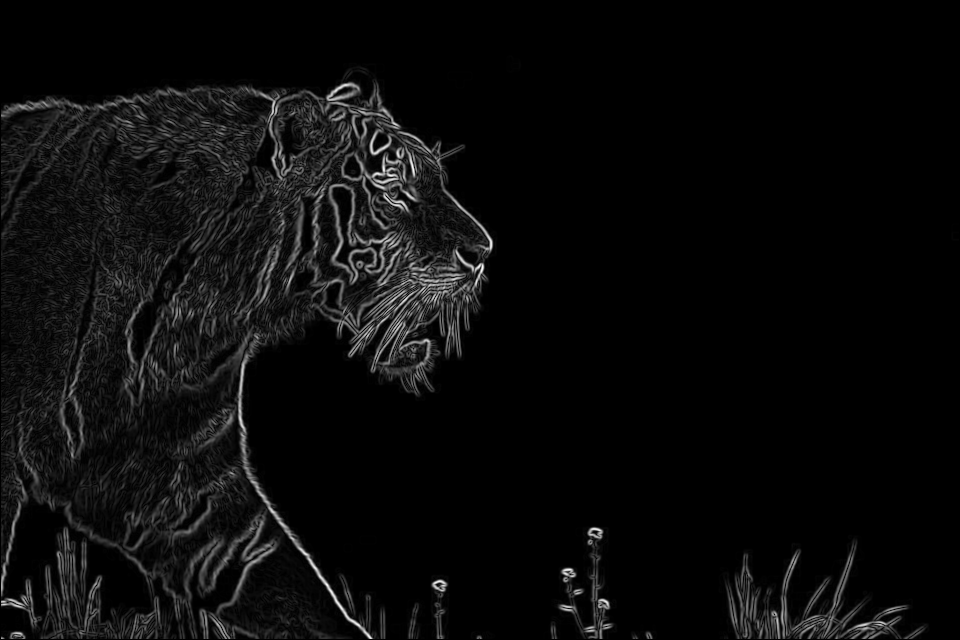

In [9]:
height, width = smoothen_img.shape
filtered_img = np.zeros((height, width), dtype=np.int32)
dx = np.zeros((height, width), dtype=np.int32)
dy = np.zeros((height, width), dtype=np.int32)

kernel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2],
                    [-1, 0, 1]],
                  np.float32)

kernel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]],
                    np.float32)

for i in range(1, height - 1):
  for j in range(1, width - 1):
    dx[i, j] = np.sum(np.multiply(smoothen_img[i - 1:i + 2, j - 1:j + 2], kernel_x))
    dy[i, j] = np.sum(np.multiply(smoothen_img[i - 1:i + 2, j - 1:j + 2], kernel_y))

filtered_img = np.sqrt(np.square(dx) + np.square(dy))
filtered_img = np.multiply(filtered_img, 255.0 / filtered_img.max())
angles = np.rad2deg(np.arctan2(dy, dx))
angles[angles < 0] += 180

cv_imshow(filtered_img)

Isn't it impressive how computer can do such a task. After our image is filtered, do you realize that the edge can look a little blurry somehow. That brings us to the next step of Canny Edge Detection which is the **Non-maximum Suppression (NMS)**. It is known for producing thin and clean edges. I guess we'll find out.

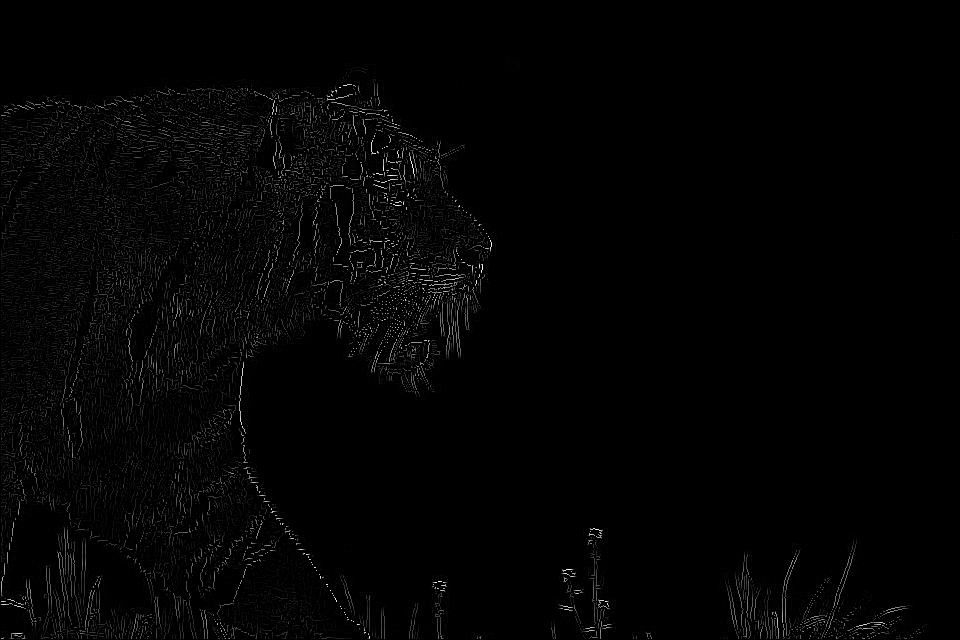

In [10]:
height, width = filtered_img.shape
suppressed_img = np.zeros((height, width), dtype=np.int32)
for i in range(1, height - 1):
  for j in range(1, width - 1):
    if 0 <= angles[i, j] < 22.5 or 157.5 <= angles[i, j] <= 180:
      value = max(filtered_img[i, j - 1], filtered_img[i, j + 1])
    elif 22.5 <= angles[i, j] < 67.5:
      value = max(filtered_img[i - 1, j - 1], filtered_img[i + 1, j + 1])
    elif 67.5 <= angles[i, j] < 112.5:
      value = max(filtered_img[i - 1, j], filtered_img[i + 1, j])
    else:
      value = max(filtered_img[i + 1, j - 1], filtered_img[i - 1, j + 1])
    
    if filtered_img[i, j] >= value:
      suppressed_img[i, j] = filtered_img[i, j]

suppressed_img = np.multiply(suppressed_img, 255.0 / suppressed_img.max())
cv_imshow(suppressed_img)

Okay, that really is the **non-maximum suppression** proving its thin and clean edges. However, the image is looking pretty dark and may be hard to recognize its edges. That brings us to the last crucial step in Canny Edge Detection which is **Hysteresis Thresholding**. In completing this step, I will divide it into thresholding and hysteresis to keep track of each process. Let's get going.

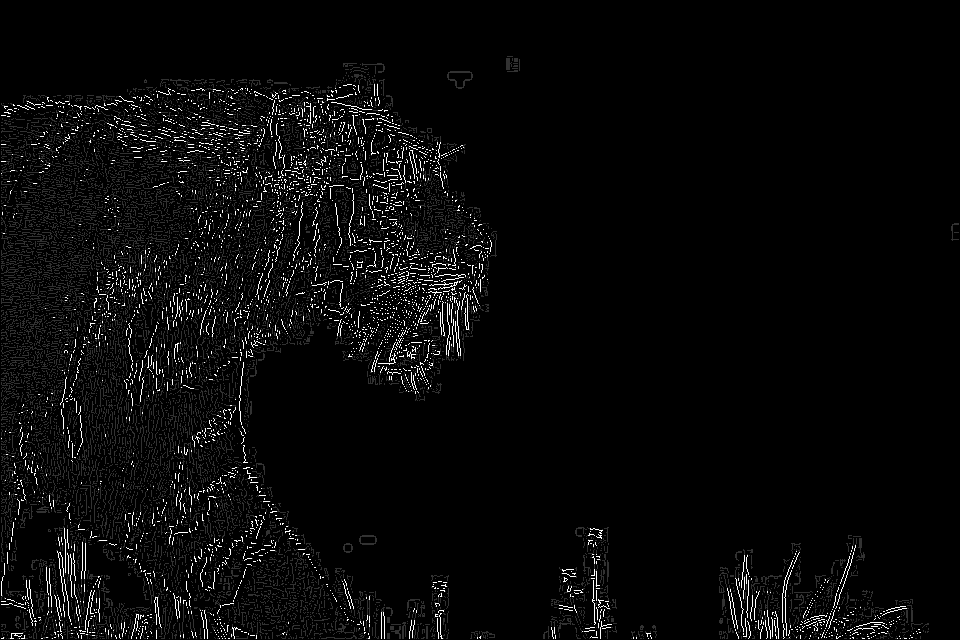

In [11]:
weak = np.int32(50)
strong = np.int32(255)
upper_threshold = suppressed_img.max() * 0.2
lower_threshold = upper_threshold * 0.005
height, width = suppressed_img.shape
thresholded_img = np.zeros((height, width), dtype=np.int32)
strong_i, strong_j = np.where(suppressed_img >= upper_threshold)
zeros_i, zeros_j = np.where(suppressed_img < lower_threshold)
weak_i, weak_j = np.where((suppressed_img <= upper_threshold) & (suppressed_img >= lower_threshold))
thresholded_img[strong_i, strong_j] = strong
thresholded_img[weak_i, weak_j] = weak
cv_imshow(thresholded_img)

As shown above, we can see here that **thresholding** differentiate pixels by strong ones, weak ones, and false ones. False ones will be completely removed from the image itself. Weak ones will be assigned with a weak pixel intensity. Strong ones will be assigned with a strong or maximum pixel intensity in most cases. Now **hysteresis** will help us identify which weak ones are unnecessary and can be considered as a part of the strong edges. 

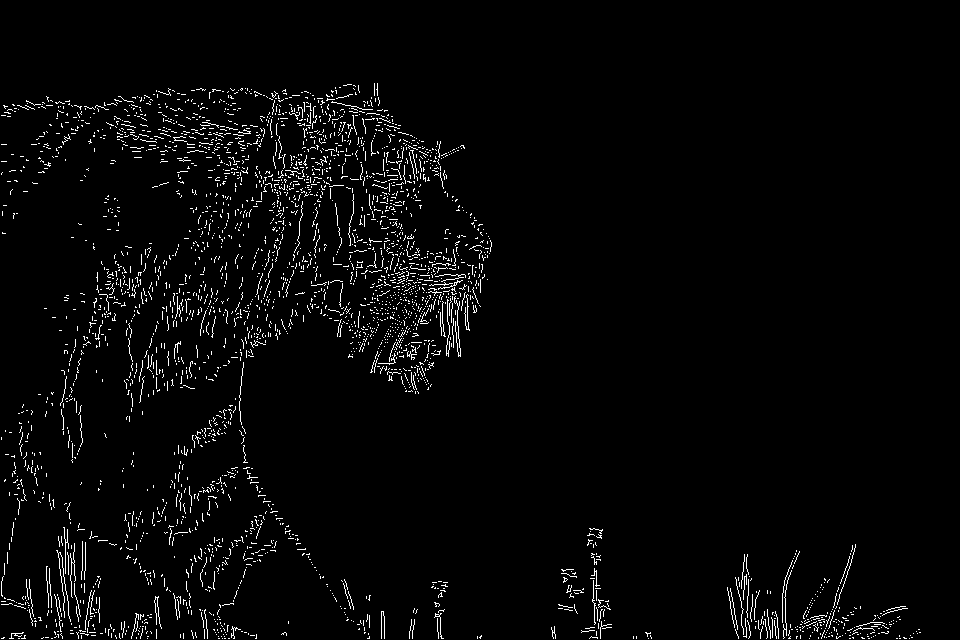

In [12]:
final_img = thresholded_img.copy()
height, width = final_img.shape
for i in range(1, height - 1):
  for j in range(1, width - 1):
    if thresholded_img[i, j] == weak:
      if (thresholded_img[i - 1, j - 1] == strong or 
          thresholded_img[i - 1, j] == strong or 
          thresholded_img[i -1, j + 1] == strong or 
          thresholded_img[i, j - 1] == strong or 
          thresholded_img[i, j + 1] == strong or 
          thresholded_img[i + 1, j - 1] == strong or 
          thresholded_img[i + 1, j] == strong or 
          thresholded_img[i + 1, j + 1] == strong):
        final_img[i, j] = strong
      else:
        final_img[i, j] = 0

cv_imshow(final_img)

Way to go! The edges is now much visible and only channeled to the maximum intensity value which make it more stunning to visualize. I would say this edge detection experimentation haven't achieved the best results with some of the tiger furs still identified as an edge. There might be better mathematical computation in any step that might improve the results. But overall, this experimentation is pretty decent I would say.

Now why don't we wrap it up by putting each step of the edge detection process as a function into a single code cell and run the whole process over using the functions we've built.

In [13]:
def get_gaussian_kernel(ksize=3, sigma=1):
  max_point = ksize // 2
  min_point = -max_point
  kernel = np.zeros((ksize, ksize))
  for x in range(min_point, max_point + 1):
    for y in range(min_point, max_point + 1):
      value = 1 / (2 * np.pi * (sigma ** 2)) * np.exp((-(x ** 2 + y ** 2)) / (2 * (sigma ** 2)))
      kernel[x - min_point, y - min_point] = value
  
  return kernel

def sobel_filter(img):
  height, width = img.shape
  filtered_img = np.zeros((height, width), dtype=np.int32)
  dx = np.zeros((height, width), dtype=np.int32)
  dy = np.zeros((height, width), dtype=np.int32)

  kernel_x = np.array([[-1, 0, 1], 
                      [-2, 0, 2],
                      [-1, 0, 1]],
                    np.float32)

  kernel_y = np.array([[1, 2, 1],
                      [0, 0, 0],
                      [-1, -2, -1]],
                      np.float32)
  
  for i in range(1, height - 1):
    for j in range(1, width - 1):
      dx[i, j] = np.sum(np.multiply(img[i - 1:i + 2, j - 1:j + 2], kernel_x))
      dy[i, j] = np.sum(np.multiply(img[i - 1:i + 2, j - 1:j + 2], kernel_y))

  filtered_img = np.sqrt(np.square(dx) + np.square(dy))
  filtered_img = np.multiply(filtered_img, 255.0 / filtered_img.max())
  angles = np.rad2deg(np.arctan2(dy, dx))
  angles[angles < 0] += 180
  return (filtered_img, angles)

def non_maximum_suppression(img, angles):
  height, width = img.shape
  suppressed_img = np.zeros((height, width), dtype=np.int32)
  for i in range(1, height - 1):
    for j in range(1, width - 1):
      if 0 <= angles[i, j] < 22.5 or 157.5 <= angles[i, j] <= 180:
        value = max(img[i, j - 1], img[i, j + 1])
      elif 22.5 <= angles[i, j] < 67.5:
        value = max(img[i - 1, j - 1], img[i + 1, j + 1])
      elif 67.5 <= angles[i, j] < 112.5:
        value = max(img[i - 1, j], img[i + 1, j])
      else:
        value = max(img[i + 1, j - 1], img[i - 1, j + 1])

      if img[i, j] >= value:
        suppressed_img[i, j] = img[i, j]

  return suppressed_img

def double_threshold(img, weak=50, strong=255, upper_threshold=.2, lower_threshold=.005):
  upper_threshold = img.max() * upper_threshold
  lower_threshold = upper_threshold * lower_threshold
  height, width = img.shape
  thresholded_img = np.zeros((height, width), dtype=np.int32)
  strong_i, strong_j = np.where(img >= upper_threshold)
  zeros_i, zeros_j = np.where(img < lower_threshold)
  weak_i, weak_j = np.where((img <= upper_threshold) & (img >= lower_threshold))
  thresholded_img[strong_i, strong_j] = strong
  thresholded_img[weak_i, weak_j] = weak
  return thresholded_img

def hysterisis(img):
  final_img = img.copy()
  height, width = final_img.shape
  for i in range(1, height - 1):
    for j in range(1, width - 1):
      if img[i, j] == weak:
        if (img[i - 1, j - 1] == strong or 
            img[i - 1, j] == strong or 
            img[i -1, j + 1] == strong or 
            img[i, j - 1] == strong or 
            img[i, j + 1] == strong or 
            img[i + 1, j - 1] == strong or 
            img[i + 1, j] == strong or 
            img[i + 1, j + 1] == strong):
          final_img[i, j] = strong
        else:
          final_img[i, j] = 0

  return final_img

In [14]:
filtered_img, angles = sobel_filter(convolve(gray_img, get_gaussian_kernel()))
suppressed_img = non_maximum_suppression(filtered_img, angles)
thresholded_img = double_threshold(suppressed_img)
final_img = hysterisis(thresholded_img)

Oh, and we can also visualize each image during the entire experimentation.

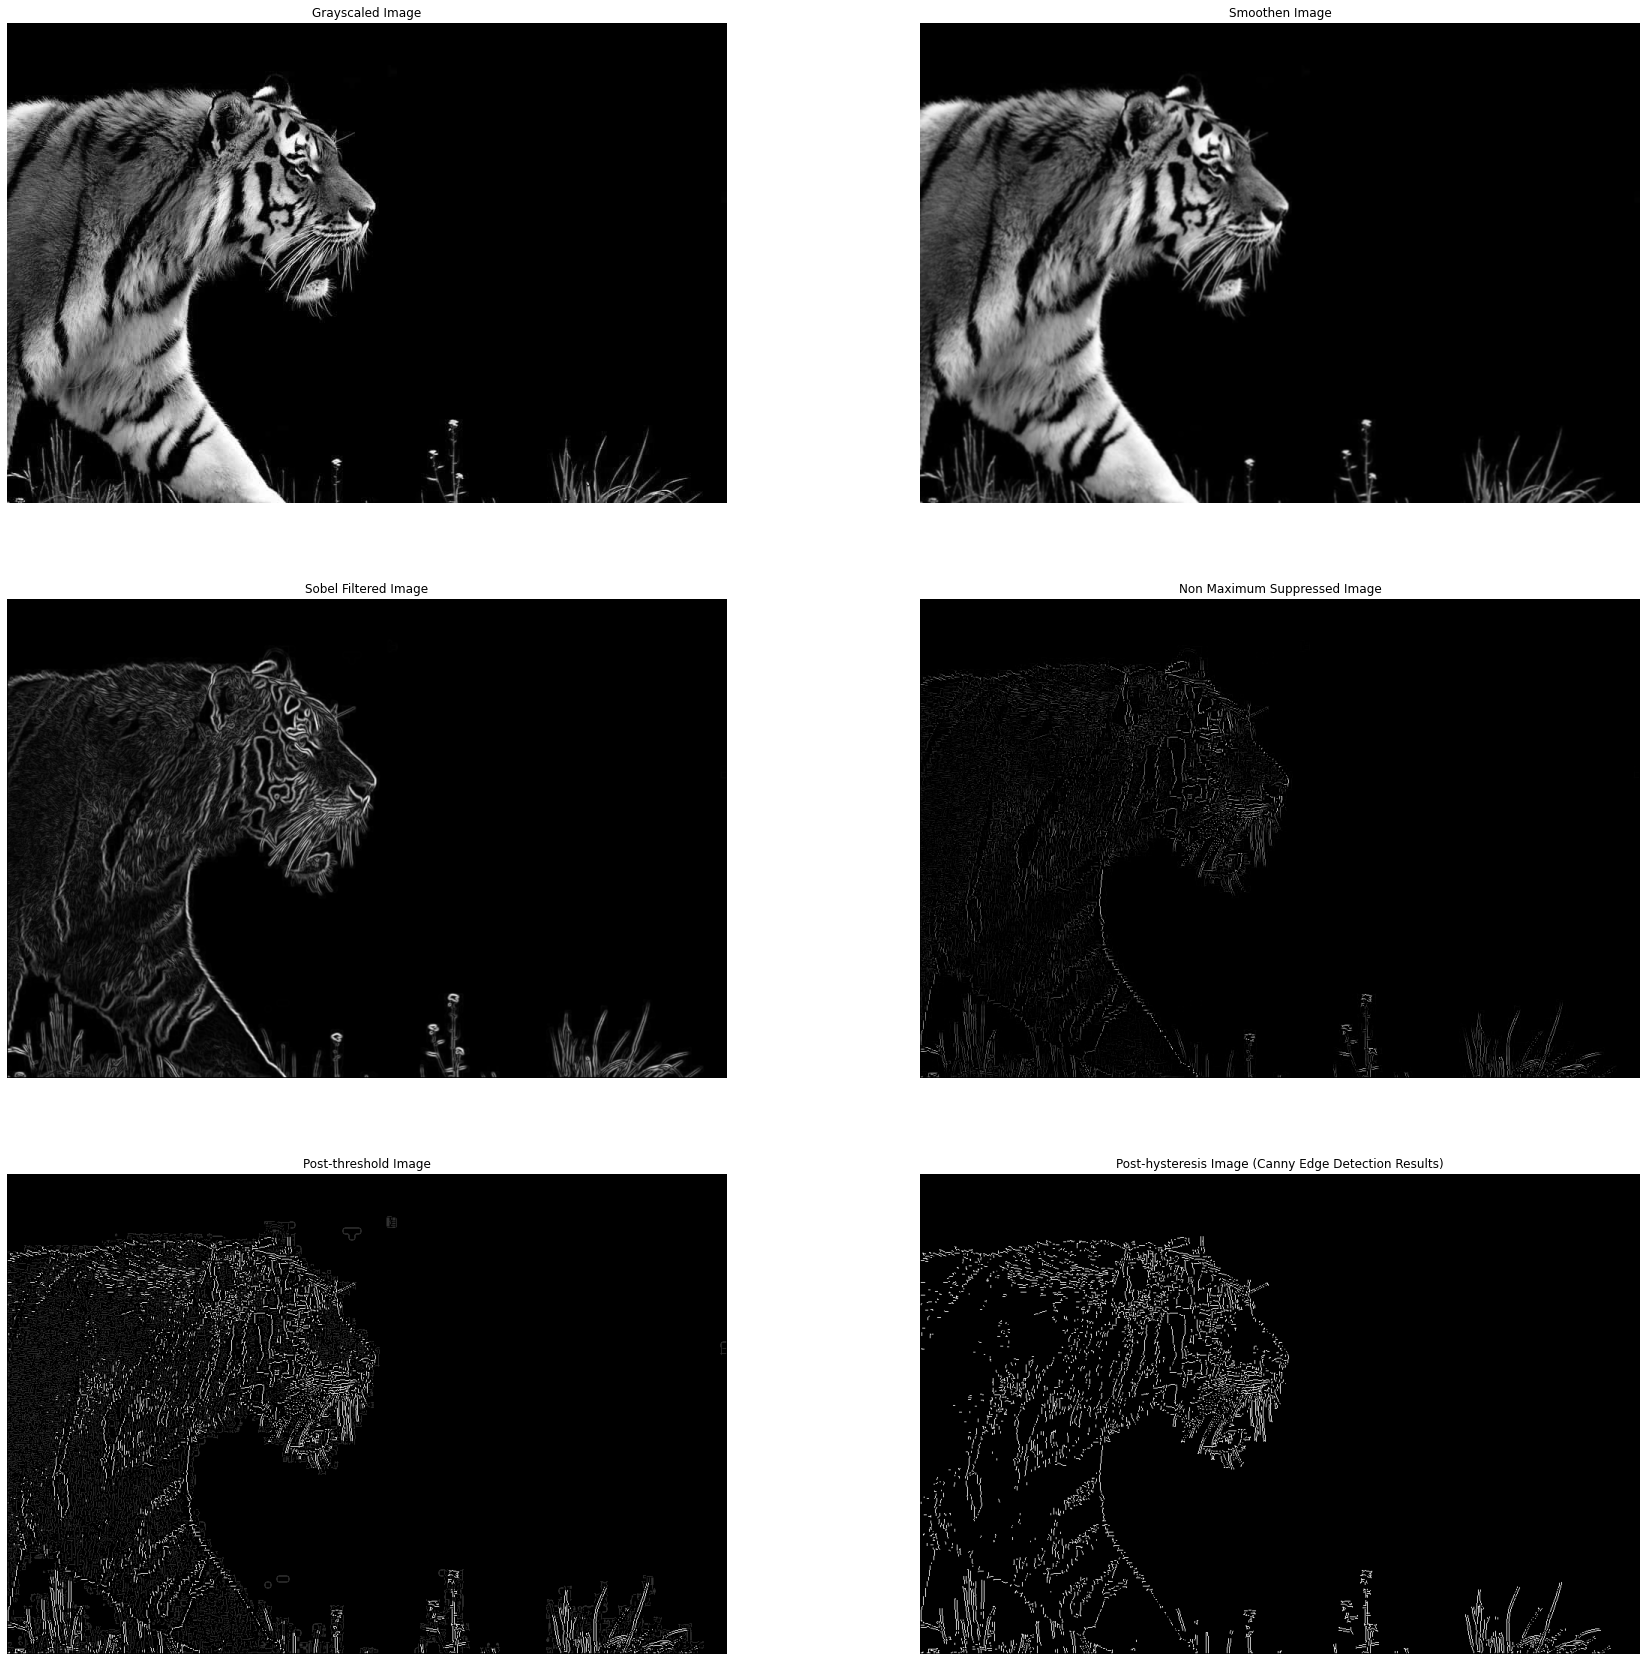

In [15]:
images = [gray_img, smoothen_img, filtered_img, suppressed_img, thresholded_img, final_img]
titles = ["Grayscaled Image", "Smoothen Image", 
          "Sobel Filtered Image", "Non Maximum Suppressed Image", 
          "Post-threshold Image", "Post-hysteresis Image (Canny Edge Detection Results)"]

fig, axes = plt.subplots(nrows=3,
                         ncols=2,
                         figsize=(30, 30))

axes = axes.flatten()
for index, (image, title) in enumerate(zip(images, titles)):
  axes[index].imshow(image, cmap="gray")
  axes[index].set_title(title)
  axes[index].axis("off")

plt.show()

Now that's what I called a visualization!